# 1. Entendimento do problema

Queremos entender a relação existente entre o valor investido em diferentes meios de publicidade e seu efeito nas vendas de produtos. Nosso conjunto de dados registra os gastos com publicidade em diferentes meios (TV, rádio, jornal) e seus correspondentes números de vendas. Aqui está uma descrição detalhada do conjunto de dados:

Colunas:

TV: Orçamento de publicidade gasto na TV (em milhares de dólares).

radio: Orçamento de publicidade gasto no rádio (em milhares de dólares).

newspaper: Orçamento de publicidade gasto em jornais (em milhares de dólares).

sales: Vendas do produto (em milhares de unidades).

# 2. Aquisição dos dados

In [ ]:
# Importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Carrega o conjunto de dados
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv'
data = pd.read_csv(url, index_col=0)

# 3. Análise dos dados

método .describe( ) para obter informações sobre as colunas numéricas

In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


método .info( ) visualizar tamanho e tipos de dados

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


método .head( ) para visualizar as primeiras 5 linhas do dataset

In [ ]:
# Mostra as primeiras linhas do Dataset
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Análise de variável

Entender a nossa variável de interesse (no caso, a coluna sales) e como ela se relaciona com as demais.

In [8]:
print('A média de vendas é:', data['sales'].mean())

A média de vendas é: 14.0225


# 4. Modelagem

Dividimos os dados em um conjunto de treino (X_train-variáveis, y_train-alvo) e uma parcela para teste (X_test - variáveis, y_train-alvo) e usamos o conjunto de teste para o treinamento do modelo de regressão linear.

In [ ]:
# Define as váriaveis de treino e váriavel alvo
X = data[['TV', 'radio', 'newspaper']]
y = data['sales']

# Divide os dados em conjuntos de treinamento e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Cria uma instância do modelo de Regressão Linear da biblioteca sklearn
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

# 5. Avaliação

In [ ]:
# Previsão dos valores do alvo usando o conjunto de teste
y_pred = reg.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {round(mse,2)}")
print(f"MAE: {round(mae, 2)}")

Mean Squared Error: 3.8
MAE: 1.51


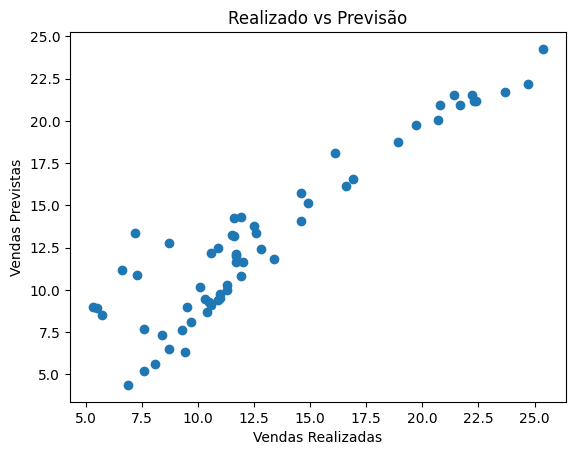

In [ ]:
# Representação gráfica de Vendas Reais vs Prevista
plt.scatter(y_test, y_pred)
plt.xlabel("Vendas Realizadas")
plt.ylabel("Vendas Previstas")
plt.title("Realizado vs Previsão")
plt.show()

In [ ]:
# Retorna os coeficientes para cada variável e o intercepto
coefficients = reg.coef_
intercept = reg.intercept_

# Equação da reta
equation = f"Vendas = {intercept:.2f} + {coefficients[0]:.2f}*TV + {coefficients[1]:.2f}*Radio + {coefficients[2]:.2f}*Newspaper"
print(f"Equação da reta: {equation}")

Equação da reta: Vendas = 2.71 + 0.04*TV + 0.20*Radio + 0.01*Newspaper


In [ ]:
from sklearn.tree import DecisionTreeRegressor

arvore = DecisionTreeRegressor(max_depth=3)
arvore.fit(X_train, y_train)
print(f'R² (Árvore): {arvore.score(X_test, y_test):.2f}')


R² (Árvore): 0.83


Conclusão: 83% da variabilidade da variável dependente (sales) pode ser explicada pelo modelo com base nas variáveis independentes utilizadas (TV, radio, newspaper).